# Projeto 4: Previsão do preço de casas

Base de dados: https://www.kaggle.com/harlfoxem/housesalesprediction

# Etapa 1: Importação das bibliotecas

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

TensorFlow 2.x selected.


'2.1.0-rc1'

# Etapa 2: Importação da base de dados

In [0]:
house_df = pd.read_csv('kc-house-data.csv', encoding = 'ISO-8859-1')

In [3]:
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
house_df.tail(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21603,7852140040,20140825T000000,507250.0,3,2.50,2270,5536,2.0,0,0,3,8,2270,0,2003,0,98065,47.5389,-121.881,2270,5731
21604,9834201367,20150126T000000,429000.0,3,2.00,1490,1126,3.0,0,0,3,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
21605,3448900210,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,3,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
21606,7936000429,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,3,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
21607,2997800021,20150219T000000,475000.0,3,2.50,1310,1294,2.0,0,0,3,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [5]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [6]:
house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Etapa 3: Visualização dos dados

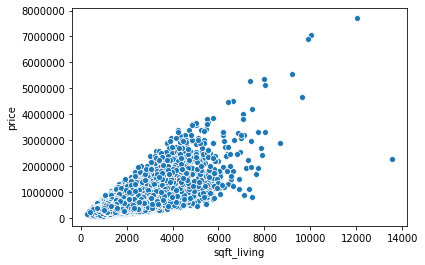

In [7]:
sns.scatterplot(x = 'sqft_living', y = 'price', data = house_df);

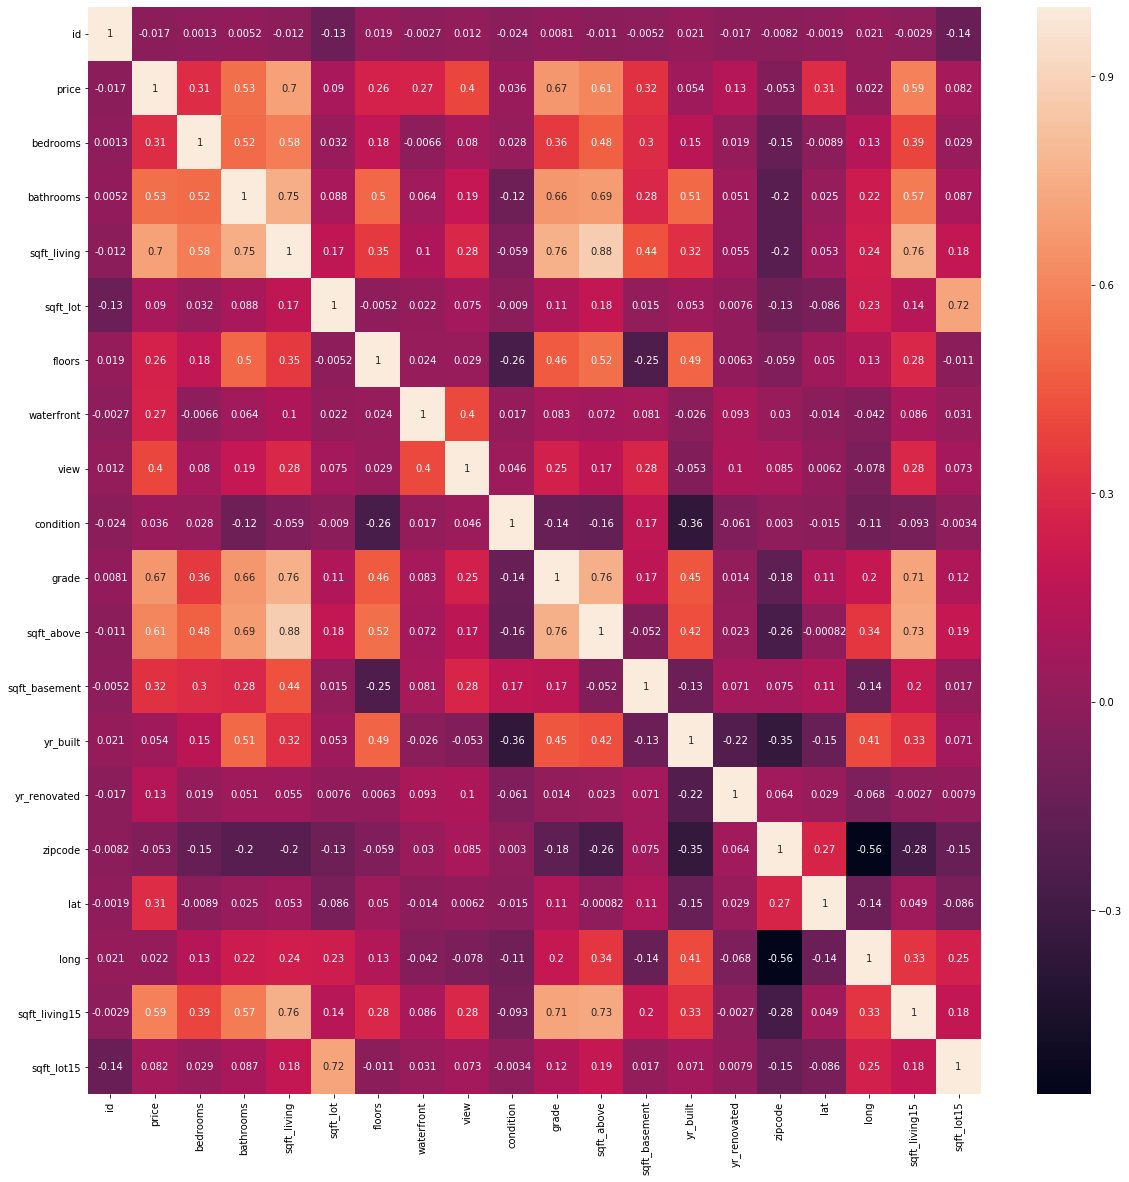

In [8]:
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(house_df.corr(), annot = True);

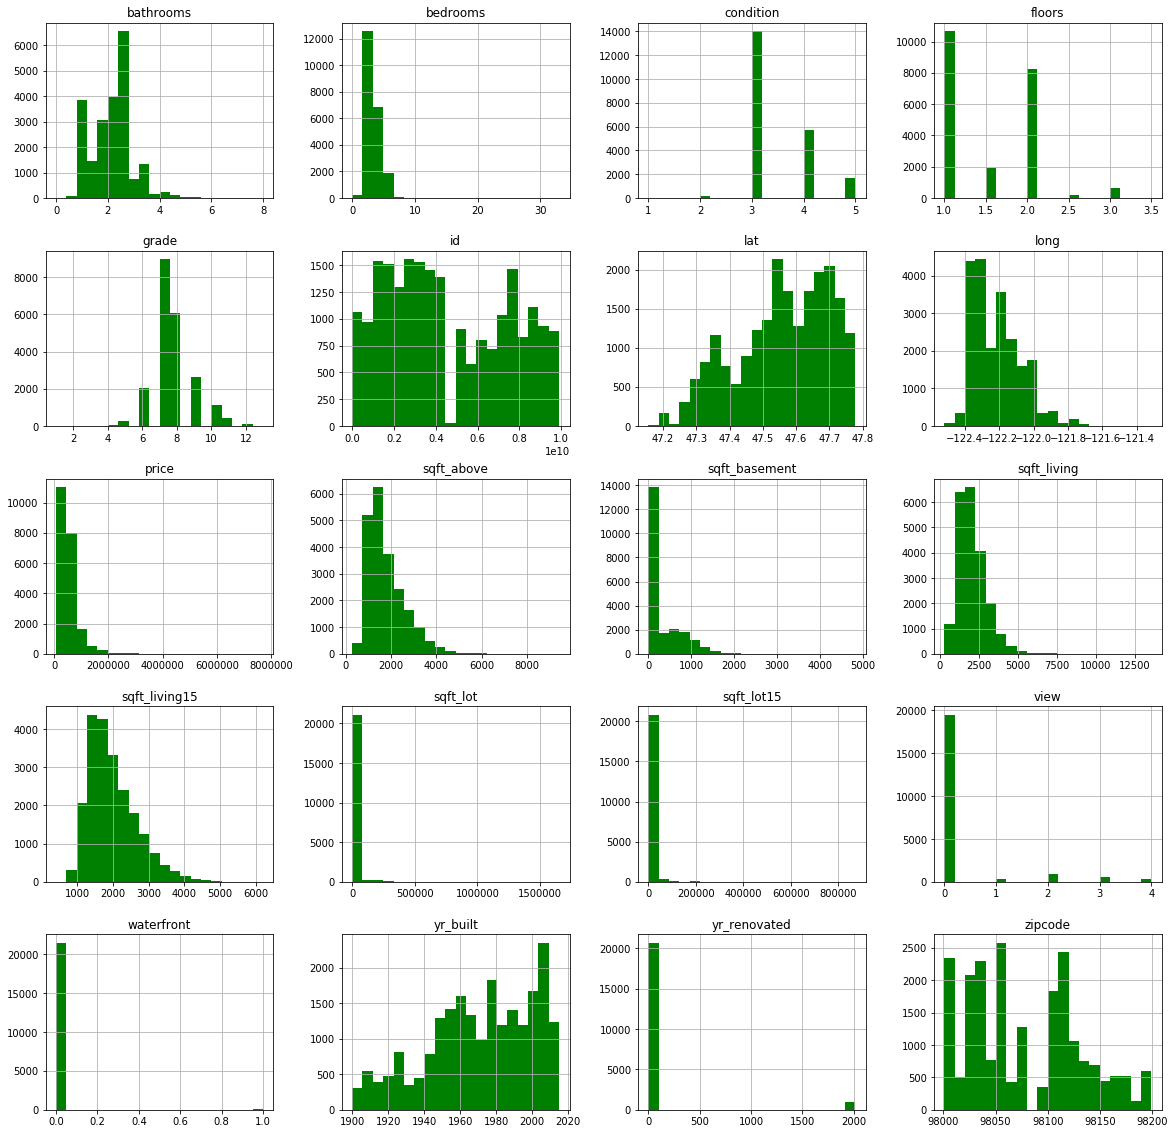

In [9]:
house_df.hist(bins = 20, figsize = (20,20), color = 'g');

In [10]:
sns.pairplot(house_df);

Output hidden; open in https://colab.research.google.com to view.

# Etapa 4: Tratamento da base de dados

In [0]:
selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement']

In [0]:
X = house_df[selected_features]

In [13]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement
0,3,1.00,1180,5650,1.0,1180,0
1,3,2.25,2570,7242,2.0,2170,400
2,2,1.00,770,10000,1.0,770,0
3,4,3.00,1960,5000,1.0,1050,910
4,3,2.00,1680,8080,1.0,1680,0


In [0]:
y = house_df['price']

In [15]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [16]:
X.shape

(21613, 7)

In [17]:
y.shape

(21613,)

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
X_scaled

array([[0.09090909, 0.125     , 0.06716981, ..., 0.        , 0.09758772,
        0.        ],
       [0.09090909, 0.28125   , 0.17207547, ..., 0.4       , 0.20614035,
        0.08298755],
       [0.06060606, 0.125     , 0.03622642, ..., 0.        , 0.05263158,
        0.        ],
       ...,
       [0.06060606, 0.09375   , 0.05509434, ..., 0.4       , 0.08004386,
        0.        ],
       [0.09090909, 0.3125    , 0.09886792, ..., 0.4       , 0.14364035,
        0.        ],
       [0.06060606, 0.09375   , 0.05509434, ..., 0.4       , 0.08004386,
        0.        ]])

In [20]:
X_scaled.shape

(21613, 7)

In [21]:
scaler.data_max_

array([3.300000e+01, 8.000000e+00, 1.354000e+04, 1.651359e+06,
       3.500000e+00, 9.410000e+03, 4.820000e+03])

In [22]:
scaler.data_min_

array([  0.,   0., 290., 520.,   1., 290.,   0.])

In [0]:
y = y.values.reshape(-1,1)

In [24]:
y.shape

(21613, 1)

In [0]:
y_scaled = scaler.fit_transform(y)

In [26]:
y_scaled

array([[0.01926557],
       [0.06072131],
       [0.01377049],
       ...,
       [0.04289849],
       [0.04262295],
       [0.03278689]])

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

In [28]:
X_train.shape

(16209, 7)

In [29]:
X_test.shape

(5404, 7)

# Etapa 5: Construção e criação do modelo

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape=(7, )))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               800       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 21,101
Trainable params: 21,101
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='Adam', loss='mean_squared_error')

In [33]:
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, validation_split = 0.2)

Train on 12967 samples, validate on 3242 samples
Epoch 1/100
12967/12967 [==============================] - 1s 111us/sample - loss: 0.0012 - val_loss: 0.0011
Epoch 2/100
12967/12967 [==============================] - 1s 63us/sample - loss: 0.0011 - val_loss: 0.0011
Epoch 3/100
12967/12967 [==============================] - 1s 58us/sample - loss: 0.0011 - val_loss: 0.0010
Epoch 4/100
12967/12967 [==============================] - 1s 59us/sample - loss: 0.0010 - val_loss: 0.0010
Epoch 5/100
12967/12967 [==============================] - 1s 61us/sample - loss: 0.0010 - val_loss: 0.0011
Epoch 6/100
12967/12967 [==============================] - 1s 57us/sample - loss: 0.0010 - val_loss: 0.0012
Epoch 7/100
12967/12967 [==============================] - 1s 55us/sample - loss: 0.0010 - val_loss: 0.0011
Epoch 8/100
12967/12967 [==============================] - 1s 60us/sample - loss: 0.0010 - val_loss: 0.0010
Epoch 9/100
12967/12967 [==============================] - 1s 62us/sample - loss: 9.93

# Etapa 6: Avaliação do modelo 

In [34]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

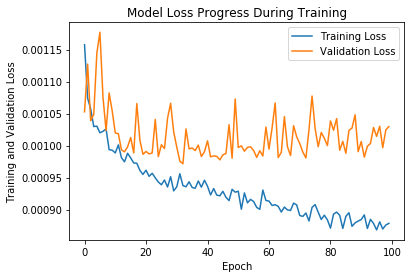

In [35]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss']);

In [36]:
# 'bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'sqft_above', 'sqft_basement'
X_test_1 = np.array([[ 4, 3, 1960, 5000, 1, 2000, 3000 ]])

scaler_1 = MinMaxScaler()
X_test_scaled_1 = scaler_1.fit_transform(X_test_1)

y_predict_1 = model.predict(X_test_scaled_1)

y_predict_1 = scaler.inverse_transform(y_predict_1)
y_predict_1

array([[252186.83]], dtype=float32)

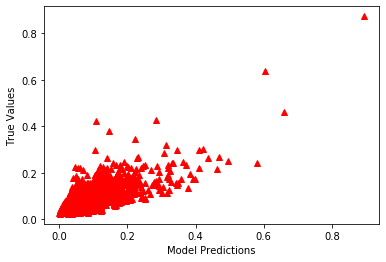

In [37]:
y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values');

In [0]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)

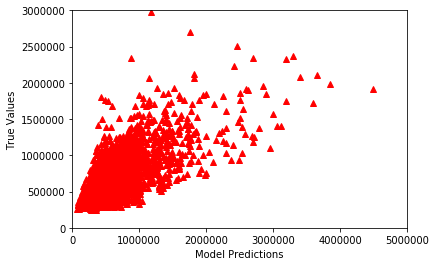

In [39]:
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.xlim(0, 5000000)
plt.ylim(0, 3000000);

In [40]:
k = X_test.shape[1]
n = len(X_test)
n

5404

In [41]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 240867.686 
MSE = 58017242322.94752 
MAE = 160731.27076586787 
R2 = 0.5726740323774144 
Adjusted R2 = 0.5721196806773852


# Etapa 7: Aumento da quantidade de características

In [0]:
selected_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'sqft_above', 'sqft_basement', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built', 
'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

X = house_df[selected_features]

In [43]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,1180,0,0,0,3,7,1180,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,2170,400,0,0,3,7,2170,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,770,0,0,0,3,6,770,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,1050,910,0,0,5,7,1050,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,1680,0,0,0,3,8,1680,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [46]:
X_scaled

array([[0.09090909, 0.125     , 0.06716981, ..., 0.21760797, 0.16193426,
        0.00574235],
       [0.09090909, 0.28125   , 0.17207547, ..., 0.16611296, 0.22216486,
        0.00802712],
       [0.06060606, 0.125     , 0.03622642, ..., 0.23754153, 0.3994149 ,
        0.00851302],
       ...,
       [0.06060606, 0.09375   , 0.05509434, ..., 0.18272425, 0.10686629,
        0.00155764],
       [0.09090909, 0.3125    , 0.09886792, ..., 0.37375415, 0.17398038,
        0.00073057],
       [0.06060606, 0.09375   , 0.05509434, ..., 0.18272425, 0.10686629,
        0.00081098]])

In [0]:
y = house_df['price']

In [0]:
y = y.values.reshape(-1,1)
y_scaled = scaler.fit_transform(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape=(19, )))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

In [0]:
model.compile(optimizer='Adam', loss='mean_squared_error')

In [51]:
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, validation_split = 0.2)

Train on 12967 samples, validate on 3242 samples
Epoch 1/100
12967/12967 [==============================] - 1s 86us/sample - loss: 8.7542e-04 - val_loss: 5.8158e-04
Epoch 2/100
12967/12967 [==============================] - 1s 63us/sample - loss: 4.8723e-04 - val_loss: 4.8271e-04
Epoch 3/100
12967/12967 [==============================] - 1s 62us/sample - loss: 4.5629e-04 - val_loss: 4.9967e-04
Epoch 4/100
12967/12967 [==============================] - 1s 62us/sample - loss: 4.3071e-04 - val_loss: 4.9629e-04
Epoch 5/100
12967/12967 [==============================] - 1s 62us/sample - loss: 3.8494e-04 - val_loss: 4.3521e-04
Epoch 6/100
12967/12967 [==============================] - 1s 60us/sample - loss: 3.7727e-04 - val_loss: 3.9938e-04
Epoch 7/100
12967/12967 [==============================] - 1s 64us/sample - loss: 3.4808e-04 - val_loss: 4.1100e-04
Epoch 8/100
12967/12967 [==============================] - 1s 63us/sample - loss: 3.2984e-04 - val_loss: 4.6928e-04
Epoch 9/100
12967/12967

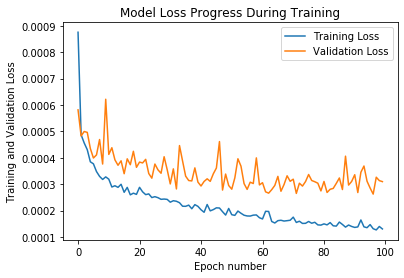

In [52]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.ylabel('Training and Validation Loss')
plt.xlabel('Epoch number')
plt.legend(['Training Loss', 'Validation Loss']);

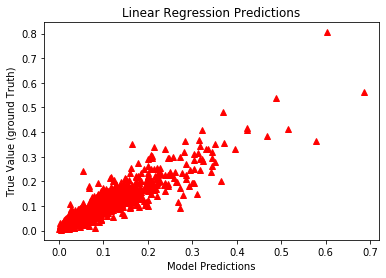

In [53]:
y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel("Model Predictions")
plt.ylabel("True Value (ground Truth)")
plt.title('Linear Regression Predictions')
plt.show()

In [0]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)

In [55]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 130306.953 
MSE = 16979902082.83851 
MAE = 74879.80061644153 
R2 = 0.8677562462031143 
Adjusted R2 = 0.8675846920376995
